In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
Train = pd.read_csv('/Users/zhengyuli/Downloads/train.csv').copy()

# Get the Data

In [2]:
housing = Train.drop("SalePrice", axis=1)
housing_labels = Train["SalePrice"].copy()
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [164]:
housing_labels

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [81]:
corr_matrix=Train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# EDA 
Using histogram for the exploring data set\
Using boxplot for categorical variable\
Checking correlation 

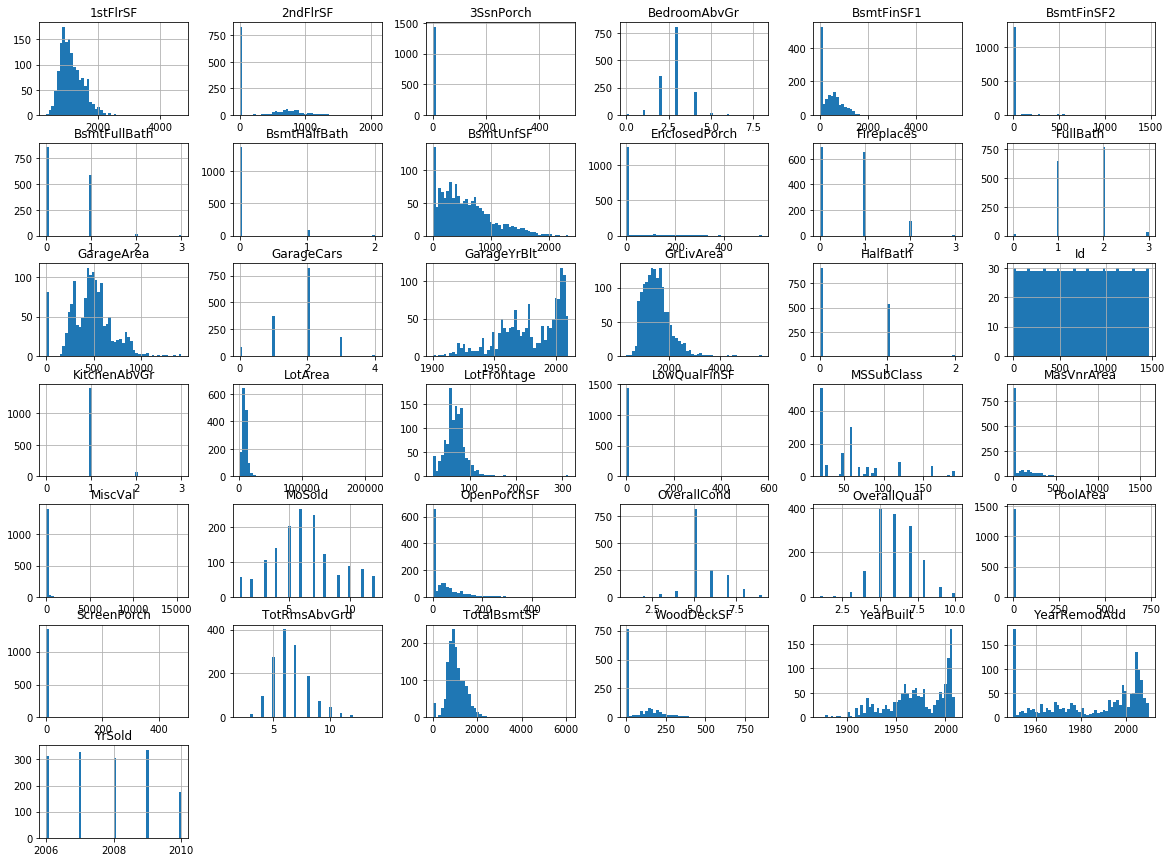

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25e770f0>,
      dtype=object)

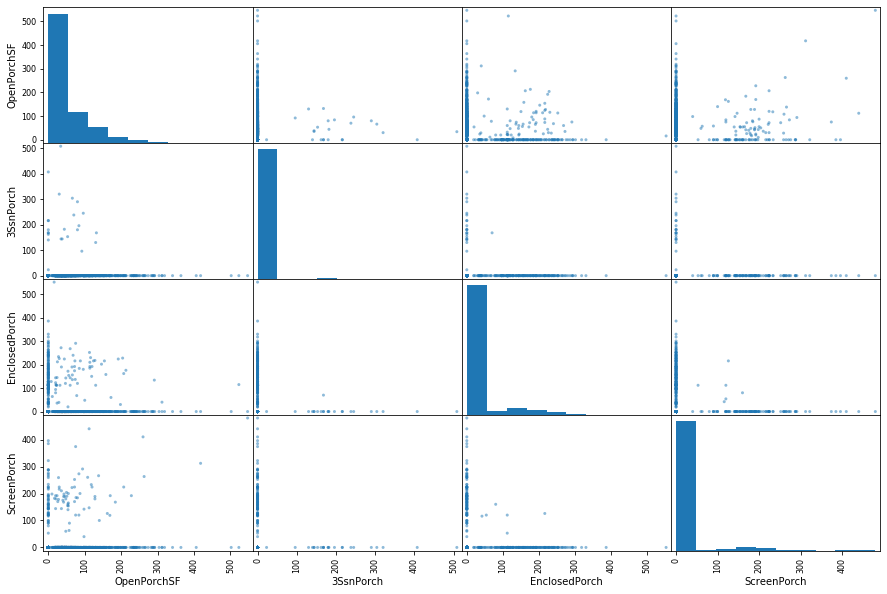

In [173]:
from pandas.plotting import scatter_matrix
attributes = ["OpenPorchSF", "3SsnPorch", "EnclosedPorch","ScreenPorch"]
scatter_matrix(Train[attributes], figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d582b0>,
      dtype=object)

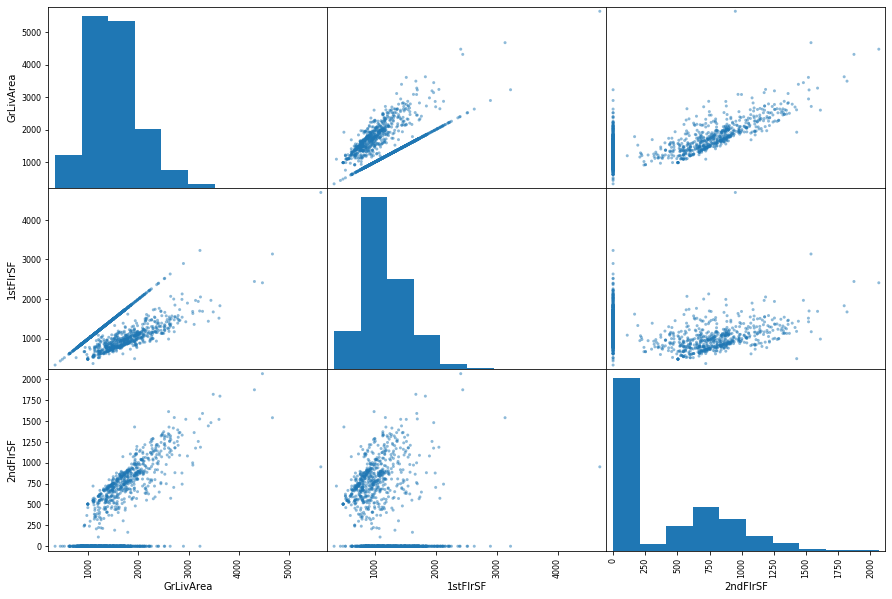

In [174]:
attributes1 = ["GrLivArea", "1stFlrSF", "2ndFlrSF"]
scatter_matrix(Train[attributes1], figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24080908>,
      dtype=object)

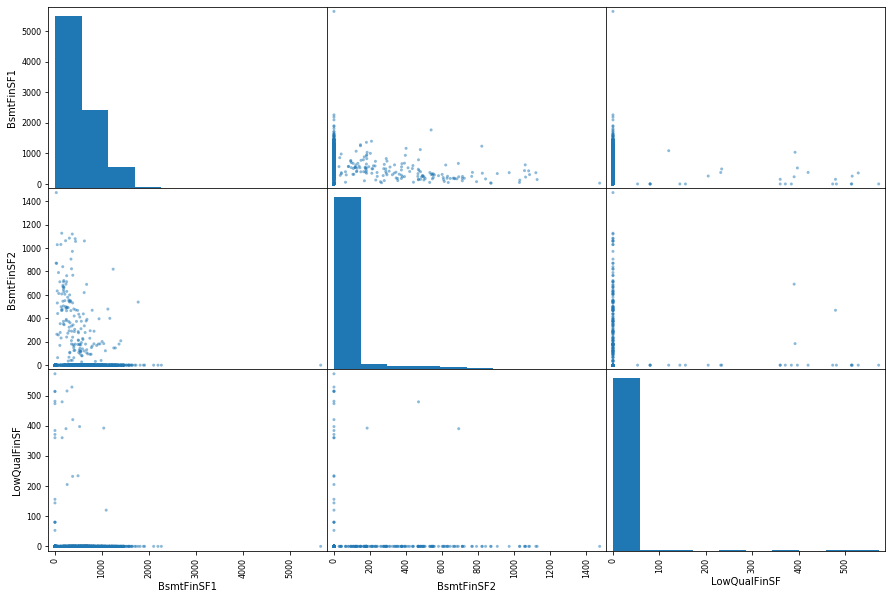

In [188]:
attributes2 =['BsmtFinSF1','BsmtFinSF2','LowQualFinSF']
scatter_matrix(housing[attributes2],figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248dcc50>,
      dtype=object)

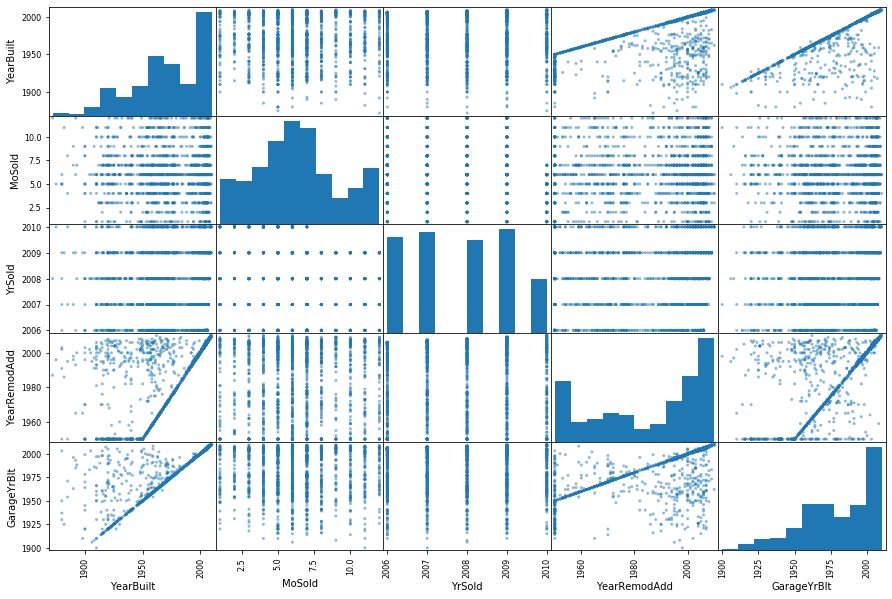

In [189]:
attributes3 =['YearBuilt','MoSold','YrSold','YearRemodAdd','GarageYrBlt']
scatter_matrix(housing[attributes3],figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248e4da0>,
      dtype=object)

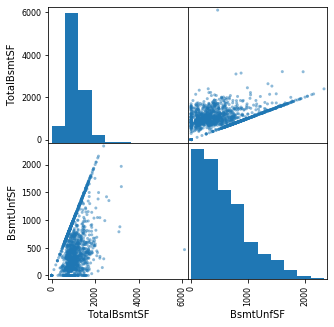

In [190]:
attributes4 =['TotalBsmtSF','BsmtUnfSF']
scatter_matrix(housing[attributes4],figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23681c88>,
      dtype=object)

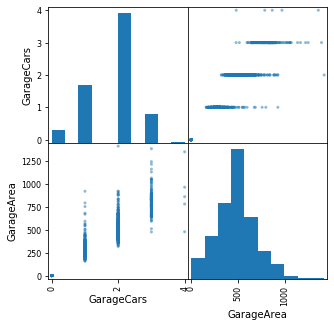

In [191]:
attributes5 =['GarageCars','GarageArea']
scatter_matrix(housing[attributes5],figsize=(5,5))

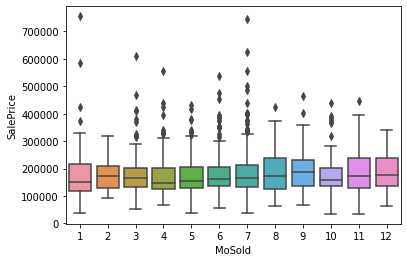

In [11]:
import seaborn as sns
ax = sns.boxplot(x="MoSold", y="SalePrice",data=Train)

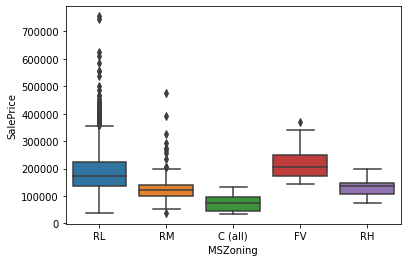

In [12]:
ax=sns.boxplot(x="MSZoning",y="SalePrice",data=Train)

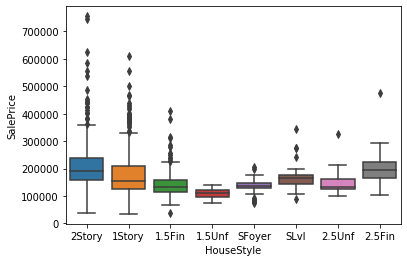

In [13]:
ax=sns.boxplot(x="HouseStyle",y="SalePrice",data=Train)

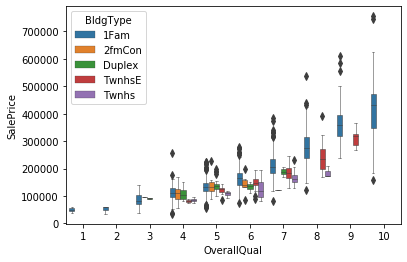

In [14]:
ax=sns.boxplot(x="OverallQual",y="SalePrice",hue="BldgType",data=Train,linewidth=0.5)

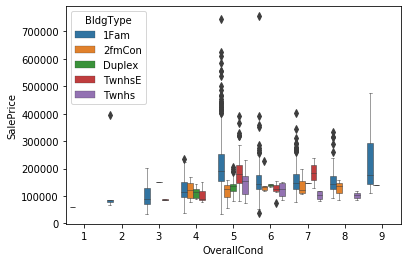

In [15]:
ax=sns.boxplot(x="OverallCond",y="SalePrice",hue="BldgType",data=Train,linewidth=0.5)

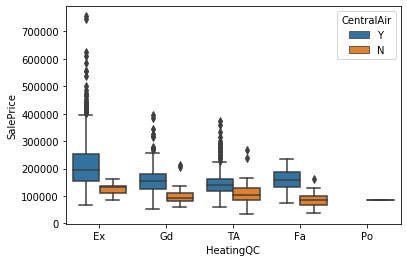

In [16]:
ax=sns.boxplot(x="HeatingQC",y="SalePrice",hue="CentralAir",data=Train)

In [18]:
Train.loc[Train.YearBuilt == Train.YearRemodAdd, 'remove'] = 'no'  
Train.loc[Train.YearBuilt != Train.YearRemodAdd, 'remove'] = 'yes' 

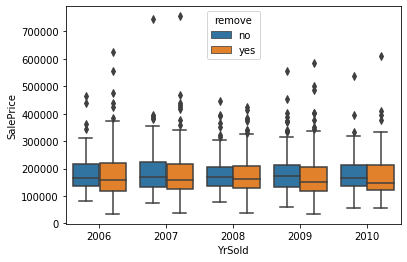

In [19]:
ax=sns.boxplot(x="YrSold",y="SalePrice",hue="remove",data=Train)

In [82]:
Train['YearRemodAdd1'] = Train['YearRemodAdd']-Train['YearBuilt']
Train['GarageYrBlt1'] = Train['GarageYrBlt']-Train['YearBuilt']

In [83]:
corr_matrix=Train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
GarageYrBlt1

# Using transformation
Recode categorical variables\
Using pipeline

In [20]:
housing['YearRemodAdd1'] = housing['YearRemodAdd']-housing['YearBuilt']
housing['GarageYrBlt1'] = housing['GarageYrBlt']-housing['YearBuilt']

In [21]:
housing_num=housing[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
     'YearRemodAdd1', 'GarageYrBlt1']]

In [65]:
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_num2 = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [66]:
housing_cat=housing[['MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']]

In [24]:
housing_cat=housing[['MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']]

In [25]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [62]:
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [71]:
ordinal_encoder=OrdinalEncoder()
housing_cat1=housing_cat.fillna('NA')
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat1)

In [72]:
housing_cat_encoded


array([[3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       ...,
       [3., 1., 1., ..., 3., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.],
       [3., 1., 1., ..., 1., 8., 4.]])

In [73]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'NA', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=obje

In [76]:
cat_encoder = OneHotEncoder()
housing_cat1=housing_cat.fillna('NA')
Y =cat_encoder.fit_transform(housing_cat1)
housing_cat2 = pd.DataFrame(Y)

In [77]:
print(Y)

  (0, 3)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 13)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 33)	1.0
  (0, 55)	1.0
  (0, 64)	1.0
  (0, 70)	1.0
  (0, 80)	1.0
  (0, 84)	1.0
  (0, 90)	1.0
  (0, 109)	1.0
  (0, 125)	1.0
  (0, 129)	1.0
  (0, 135)	1.0
  (0, 141)	1.0
  (0, 144)	1.0
  (0, 150)	1.0
  (0, 157)	1.0
  (0, 162)	1.0
  (0, 165)	1.0
  :	:
  (1459, 135)	1.0
  (1459, 141)	1.0
  (1459, 143)	1.0
  (1459, 152)	1.0
  (1459, 157)	1.0
  (1459, 162)	1.0
  (1459, 164)	1.0
  (1459, 173)	1.0
  (1459, 178)	1.0
  (1459, 185)	1.0
  (1459, 189)	1.0
  (1459, 195)	1.0
  (1459, 199)	1.0
  (1459, 206)	1.0
  (1459, 210)	1.0
  (1459, 214)	1.0
  (1459, 220)	1.0
  (1459, 229)	1.0
  (1459, 235)	1.0
  (1459, 238)	1.0
  (1459, 242)	1.0
  (1459, 247)	1.0
  (1459, 249)	1.0
  (1459, 261)	1.0
  (1459, 266)	1.0


In [29]:
list(housing_num)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'YearRemodAdd1',
 'GarageYrBlt1']

In [90]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()), 
])

In [108]:
cat_pipeline1 = Pipeline([
('imputer', SimpleImputer(strategy='constant',fill_value='NA')),
('OrdinalEncoder', OrdinalEncoder()),
])

In [ ]:
cat_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='constant',fill_value='NA')),
('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
])

In [109]:
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline1, cat_attribs),
])
housing_prepared1 = full_pipeline.fit_transform(housing)

In [110]:
housing_prepared1

array([[-1.73086488,  0.07337496, -0.22087509, ...,  1.        ,
         8.        ,  4.        ],
       [-1.7284922 , -0.87256276,  0.46031974, ...,  1.        ,
         8.        ,  4.        ],
       [-1.72611953,  0.07337496, -0.08463612, ...,  1.        ,
         8.        ,  4.        ],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ...,  3.        ,
         8.        ,  4.        ],
       [ 1.7284922 , -0.87256276, -0.08463612, ...,  1.        ,
         8.        ,  4.        ],
       [ 1.73086488, -0.87256276,  0.23325479, ...,  1.        ,
         8.        ,  4.        ]])

# Model selection

## Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared1, housing_labels)

In [91]:
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [92]:
housing_prepared

<1460x307 sparse matrix of type '<class 'numpy.float64'>'
	with 119720 stored elements in Compressed Sparse Row format>

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20505.680296434577

In [114]:
mape = np.mean(np.abs(housing_labels - housing_predictions) 
               / housing_labels)
mape

0.0781707932011472

In [95]:
ridge_reg=Ridge()
ridge_reg.fit(housing_prepared, housing_labels)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = ridge_reg.predict(housing_prepared)
ridge_mse = mean_squared_error(housing_labels, housing_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse
mape_ridge = np.mean(np.abs(housing_labels - housing_predictions) 
               / housing_labels)
mape_ridge

0.08573349855124669

In [175]:
ridge_rmse

22971.244779194854

In [116]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(housing_prepared, housing_labels)


/Users/zhengyuli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62656344130.77814, tolerance: 920791133.4609975
  max_iter, tol, rng, random, positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = lasso_reg.predict(housing_prepared)
lasso_mse = mean_squared_error(housing_labels, housing_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

20511.984065126548

In [118]:
mape_lasso = np.mean(np.abs(housing_labels - housing_predictions) 
               / housing_labels)
mape_lasso

0.07826439976738805

In [119]:
Test = pd.read_csv('/Users/zhengyuli/Downloads/test.csv').copy()

In [121]:
Test_num=Test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
     ]]

In [122]:
imputer = SimpleImputer(strategy="median")
imputer.fit(Test_num)
X = imputer.transform(Test_num)
Test_num2 = pd.DataFrame(X, columns=Test_num.columns,index=Test_num.index)

In [123]:
Test_cat=Test[['MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']]

In [124]:
cat_encoder = OneHotEncoder()
Test_cat1=Test_cat.fillna('NA')
Y =cat_encoder.fit_transform(Test_cat1)
Test_cat2 = pd.DataFrame(Y)

In [169]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
])
cat_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='constant',fill_value='NA')),
('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
])
num_attribs = list(Test_num)
cat_attribs = list(Test_cat)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])
Test_prepared = full_pipeline.fit_transform(Test)

In [170]:
Test_prepared

<1459x293 sparse matrix of type '<class 'numpy.float64'>'
	with 99374 stored elements in Compressed Sparse Row format>

In [145]:
Testact = pd.read_csv('/Users/zhengyuli/Downloads/test_actual_price.csv')

In [146]:
Testact.head()

,Id,SalePrice
0,1975,615000
1,1664,610000
2,2264,591587
3,2683,584500
4,1678,552000


In [155]:
Testact1=Testact.sort_values(by='Id')


In [165]:
Testact1.head()


,Id,SalePrice
1305,1461,105000
621,1462,172000
485,1463,189900
450,1464,195500
474,1465,191500


In [166]:
act=Testact1['SalePrice']

In [167]:
lin_reg = LinearRegression()
lin_reg.fit(Test_prepared, act)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
import numpy as np
from sklearn.metrics import mean_squared_error
Test_predictions = lin_reg.predict(Test_prepared)

mape_lin = np.mean(np.abs(act - Test_predictions) 
               / act)
mape_lin

0.07941226932463068

In [183]:
lin_mse = mean_squared_error(act, Test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18411.450666206732

In [185]:
ridge_reg=Ridge()
ridge_reg.fit(Test_prepared, act)
Test_predictions = ridge_reg.predict(Test_prepared)
ridge_mse = mean_squared_error(act, Test_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse
mape_ridge = np.mean(np.abs(act - Test_predictions) 
               / act)
mape_ridge

0.17477338829730144

In [186]:
lasso_reg=Lasso()
lasso_reg.fit(Test_prepared, act)

Test_predictions = lasso_reg.predict(Test_prepared)
lasso_mse = mean_squared_error(act, Test_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse


/Users/zhengyuli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248646897152.22195, tolerance: 945345275.667441
  max_iter, tol, rng, random, positive)


18367.46248122571

In [187]:
mape_lasso = np.mean(np.abs(act - Test_predictions) 
               / act)
mape_lasso

0.07867717701525519

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### This decision tree model mse is 0 which is too prefect. The data is too overfitting

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [40]:
display_scores(tree_rmse_scores)

Scores: [35484.34438913 41637.57901717 35006.85713298 41364.61043449
 40122.54852819 41046.73128419 32139.32627671 35180.18873453
 54976.5573552  35951.76251343]
Mean: 39291.05056660168
Standard deviation: 6096.370137008334


In [41]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [22151.60913914 34966.2655396  25041.82705417 40632.8279475
 31829.29181751 39965.72059182 25180.29743874 24624.4651339
 65149.03888556 26562.47696136]
Mean: 33610.382050931905
Standard deviation: 12229.522716211333


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

/Users/zhengyuli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0

In [43]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [27277.72950723 24998.34397919 25096.58544768 38071.82089142
 34848.53997572 26263.7238482  22942.0466123  23804.45883673
 44202.39439674 29705.77842467]
Mean: 29721.142191988118
Standard deviation: 6695.59241765481


### Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48609.72317753179 {'max_features': 2, 'n_estimators': 3}
39398.35133258668 {'max_features': 2, 'n_estimators': 10}
39003.26670510847 {'max_features': 2, 'n_estimators': 30}
46516.43458733819 {'max_features': 4, 'n_estimators': 3}
39085.88415481935 {'max_features': 4, 'n_estimators': 10}
35223.594717742395 {'max_features': 4, 'n_estimators': 30}
43832.12766451916 {'max_features': 6, 'n_estimators': 3}
38900.46238214659 {'max_features': 6, 'n_estimators': 10}
34444.717947134195 {'max_features': 6, 'n_estimators': 30}
43303.41361277277 {'max_features': 8, 'n_estimators': 3}
36492.72595309957 {'max_features': 8, 'n_estimators': 10}
33607.98578279075 {'max_features': 8, 'n_estimators': 30}
42548.03152369835 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39384.155722904005 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
43116.02347700222 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
38406.34081901827 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [49]:
Test = pd.read_csv('/Users/zhengyuli/Downloads/test.csv').copy()
Value= pd.read_csv('/Users/zhengyuli/Downloads/test_actual_price.csv').copy()
final_model = grid_search.best_estimator_
Test['YearRemodAdd1'] = Test['YearRemodAdd']-Test['YearBuilt']
Test['GarageYrBlt1'] = Test['GarageYrBlt']-Test['YearBuilt']
X_test = Test
y_test = Value.sort_values(by='Id')["SalePrice"].copy()

In [50]:
X_test_prepared = full_pipeline.transform(X_test)

In [51]:
y_test

1305    105000
621     172000
485     189900
450     195500
474     191500
592     175900
515     185000
557     180400
627     171500
1130    126000
531     184000
1352     96000
1303    105500
822     149900
1191    120000
46      376162
135     290941
165     275000
200     259000
8       500000
90      320000
402     205000
435     199500
709     160000
528     184500
514     185088
63      355000
321     221500
406     204500
171     271500
         ...  
1391     85000
967     139000
1446     51689
1247    115000
1414     78000
49      375000
121     300000
253     242500
893     145000
390     209000
849     148000
226     250764
419     202000
92      320000
60      359900
1458     81500
356     215000
1315    104500
1129    126500
867     146500
1422     73000
1409     79400
952     140000
1379     87550
1408     79500
1368     90500
1425     71000
1059    131000
1048    132000
498     188000
Name: SalePrice, Length: 1459, dtype: int64

In [52]:
final_predictions = final_model.predict(X_test_prepared)

In [53]:
final_predictions

array([137751.13333333, 156333.33333333, 186900.        , ...,
       159282.76666667, 116568.33333333, 234906.83333333])

In [54]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
final_rmse

29035.61583818746

In [56]:
Test['SalePrice_pred'] = final_predictions

In [59]:
from pandas import DataFrame
df = DataFrame(Test, columns= ['Id', 'SalePrice_pred'])
export_csv = df.to_csv (r'/Users/zhengyuli/Downloads/predict.csv', index = None, header=True) 

In [61]:
import pandas as pd

p = pd.read_csv('/Users/zhengyuli/Downloads/predict.csv')
o = pd.read_csv('/Users/zhengyuli/Downloads/test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice'] - eva['SalePrice_pred']) / eva['SalePrice'])
print(mape)

0.11985689116625277
